<a href="https://colab.research.google.com/github/GauravSahani1417/Kaggle-Playground-Series-March-2021/blob/main/Playground_Series_March_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/March 2021 Playground series/train_New.csv")
df_test = pd.read_csv("/content/drive/MyDrive/March 2021 Playground series/test.csv")

In [3]:
df_train.head()

id cat0 cat1 cat2 cat3  ...     cont7     cont8     cont9    cont10 target
0   0    A    I    A    B  ...  0.791921  0.815254  0.965006  0.665915      0
1   1    A    I    A    A  ...  0.408701  0.399353  0.927406  0.493729      0
2   2    A    K    A    A  ...  0.388835  0.412303  0.292696  0.549452      0
3   3    A    K    A    C  ...  0.897617  0.633669  0.760318  0.934242      0
4   4    A    I    G    B  ...  0.279167  0.351103  0.357084  0.328960      1

[5 rows x 32 columns]

In [4]:
df_test.head()

id cat0 cat1 cat2 cat3  ...     cont6     cont7     cont8     cont9    cont10
0   5    A    F    A    A  ...  0.551249  0.655693  0.598331  0.359987  0.947489
1   6    A    H    C    A  ...  0.248987  0.654614  0.347944  0.565520  0.388580
2   8    A    N    C    A  ...  0.746740  0.335590  0.341238  0.252289  0.411592
3   9    B    L    C    A  ...  0.538724  0.381566  0.481660  0.348514  0.325723
4  11    A    F    A    B  ...  0.178920  0.763479  0.562491  0.466261  0.585781

[5 rows x 31 columns]

In [5]:
# !pip install sweetviz
# import sweetviz as sv

In [6]:
# #EDA using Autoviz
# sweet_report_Train = sv.analyze(df_train)
# sweet_report_Test = sv.analyze(df_test)

# #Saving results to HTML file
# sweet_report_Train.show_html("/content/drive/MyDrive/March 2021 Playground series/output_sweetViz_Train.html")
# sweet_report_Test.show_html("/content/drive/MyDrive/March 2021 Playground series/output_sweetViz_Test.html")

In [7]:
df_train.drop("id", axis=1, inplace=True)
df_test.drop("id", axis=1, inplace=True)

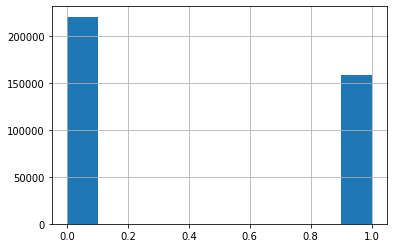

In [8]:
df_train['target'].hist()

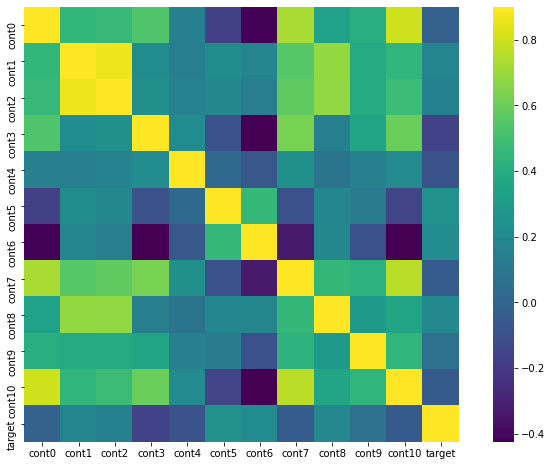

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, vmax=0.9, cmap="viridis", square=True)

In [10]:
df_train.corr()

cont0     cont1     cont2  ...     cont9    cont10    target
cont0   1.000000  0.444635  0.461681  ...  0.405250  0.799515 -0.017327
cont1   0.444635  1.000000  0.865699  ...  0.384638  0.443639  0.180460
cont2   0.461681  0.865699  1.000000  ...  0.387361  0.476451  0.153905
cont3   0.533306  0.207083  0.236486  ...  0.354219  0.599530 -0.165117
cont4   0.147001  0.139104  0.164124  ...  0.145503  0.201929 -0.084586
cont5  -0.167878  0.213585  0.187680  ...  0.126065 -0.160210  0.242491
cont6  -0.417294  0.172489  0.129404  ... -0.098736 -0.421825  0.208589
cont7   0.724153  0.549552  0.574646  ...  0.428672  0.765016 -0.046457
cont8   0.340813  0.687372  0.680105  ...  0.286467  0.356049  0.196697
cont9   0.405250  0.384638  0.387361  ...  1.000000  0.440255  0.066645
cont10  0.799515  0.443639  0.476451  ...  0.440255  1.000000 -0.053986
target -0.017327  0.180460  0.153905  ...  0.066645 -0.053986  1.000000

[12 rows x 12 columns]

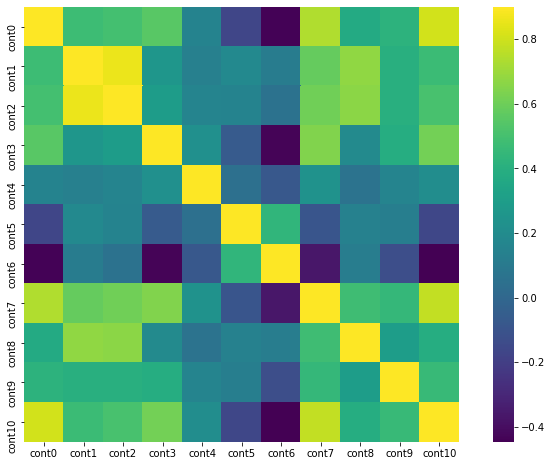

In [11]:
corr = df_test.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, vmax=0.9, cmap="viridis", square=True)

In [12]:
#Cont1 and Cont2 are quiet dependent on each other! 
#Also Cont0 and Cont10 have relation with each other!
## Hence its better to remove Cont1 & Cont10

In [13]:
df_train.drop("cont1", axis=1, inplace=True)
df_test.drop("cont1", axis=1, inplace=True)

df_train.drop("cont10", axis=1, inplace=True)
df_test.drop("cont10", axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
for c in df_train.columns: 
    if df_train[c].dtype=='object':
        LE = LabelEncoder()
        LE.fit(list(df_train[c].values) + list(df_train[c].values))
        df_train[c] = LE.transform(df_train[c].values)
        
df_train.head()

cat0  cat1  cat2  cat3  cat4  ...     cont6     cont7     cont8     cont9  target
0     0     8     0     1     1  ...  0.592184  0.791921  0.815254  0.965006       0
1     0     8     0     0     4  ...  0.600044  0.408701  0.399353  0.927406       0
2     0    10     0     0     4  ...  0.352113  0.388835  0.412303  0.292696       0
3     0    10     0     2     4  ...  0.221789  0.897617  0.633669  0.760318       0
4     0     8     6     1     4  ...  0.578764  0.279167  0.351103  0.357084       1

[5 rows x 29 columns]

In [16]:
for c in df_test.columns: 
    if df_test[c].dtype=='object':
        LE = LabelEncoder()
        LE.fit(list(df_test[c].values) + list(df_test[c].values))
        df_test[c] = LE.transform(df_test[c].values)
        
df_test.head()

cat0  cat1  cat2  cat3  ...     cont6     cont7     cont8     cont9
0     0     5     0     0  ...  0.551249  0.655693  0.598331  0.359987
1     0     7     2     0  ...  0.248987  0.654614  0.347944  0.565520
2     0    13     2     0  ...  0.746740  0.335590  0.341238  0.252289
3     1    11     2     0  ...  0.538724  0.381566  0.481660  0.348514
4     0     5     0     1  ...  0.178920  0.763479  0.562491  0.466261

[5 rows x 28 columns]

In [17]:
#Adding all features except Target column
feature_cols = [c for c in df_train.columns if c != "target"]

In [18]:
feature_cols

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cont0',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9']

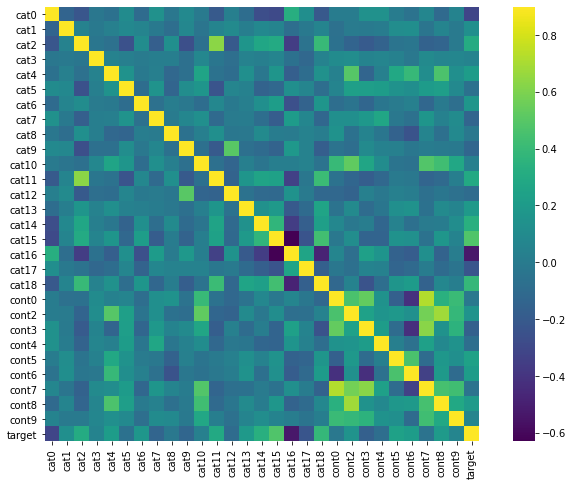

In [19]:
corr = df_train.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, vmax=0.9, cmap="viridis", square=True)

In [20]:
train_x = df_train[feature_cols]
train_y = df_train.target
test_x = df_test

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [22]:
folds = KFold(n_splits=10, shuffle=True, random_state=33)

In [23]:
class FoldsAverageLGBM:
    def __init__(self, folds):
        self.folds = folds
        self.models = []
        
    def fit(self, lgb_params, train_x, train_y):
        oof_preds = np.zeros_like(train_y)
        
        self.train_x = train_x.values
        self.train_y = train_y.values
        
        for tr_idx, va_idx in tqdm(folds.split(train_x)):
            tr_x, va_x = self.train_x[tr_idx], self.train_x[va_idx]
            tr_y, va_y = self.train_y[tr_idx], self.train_y[va_idx]
            
            lgb_train_dataset = lgb.Dataset(tr_x, tr_y)
            lgb_valid_dataset = lgb.Dataset(va_x, va_y)
            model = lgb.train(lgb_params, lgb_train_dataset, valid_sets=[lgb_valid_dataset], verbose_eval=100)
            self.models.append(model)
            
            oof_pred = model.predict(va_x)
            oof_preds[va_idx] = oof_pred
            
        self.oof_preds = oof_preds
        
    def predict(self, test_x):
        preds = []
        for model in tqdm(self.models):
            pred = model.predict(test_x)
            preds.append(pred)
        preds = np.mean(preds, axis=0)
        return preds

In [24]:
#parameters after optuna
lgbm_parameters = {
    'metric': 'auc', 
    'n_estimators': 20000,
    'reg_alpha': 0.000721024661208569,
    'reg_lambda': 47.79748127808107,
    'colsample_bytree': 0.24493010466517195,
    'subsample': 0.12246675404710294,
    'learning_rate': 0.013933182980403087,
    'max_depth': 21,
    'num_leaves': 90,
    'min_child_samples': 144,
    'cat_smooth': 63
}

In [25]:
folds_average_lgbm = FoldsAverageLGBM(folds)

In [26]:
from tqdm.notebook import tqdm

In [27]:
folds_average_lgbm.fit(lgbm_parameters, train_x, train_y)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's auc: 0.888862
[200]	valid_0's auc: 0.891682
[300]	valid_0's auc: 0.893708
[400]	valid_0's auc: 0.895163
[500]	valid_0's auc: 0.896393
[600]	valid_0's auc: 0.897399
[700]	valid_0's auc: 0.898252
[800]	valid_0's auc: 0.898937
[900]	valid_0's auc: 0.899582
[1000]	valid_0's auc: 0.900148
[1100]	valid_0's auc: 0.900626
[1200]	valid_0's auc: 0.901077
[1300]	valid_0's auc: 0.901514
[1400]	valid_0's auc: 0.901926
[1500]	valid_0's auc: 0.902276
[1600]	valid_0's auc: 0.902649
[1700]	valid_0's auc: 0.902987
[1800]	valid_0's auc: 0.903315
[1900]	valid_0's auc: 0.903654
[2000]	valid_0's auc: 0.90399
[2100]	valid_0's auc: 0.904295
[2200]	valid_0's auc: 0.904658
[2300]	valid_0's auc: 0.904973
[2400]	valid_0's auc: 0.905293
[2500]	valid_0's auc: 0.905589
[2600]	valid_0's auc: 0.905878
[2700]	valid_0's auc: 0.906218
[2800]	valid_0's auc: 0.906506
[2900]	valid_0's auc: 0.906778
[3000]	valid_0's auc: 0.90705
[3100]	valid_0's auc: 0.907341
[3200]	valid_0's auc: 0.907593
[3300]	valid_0's au

In [28]:
np.sqrt(mean_squared_error(df_train.target, folds_average_lgbm.oof_preds))

0.6146174785024816

In [29]:
y_pred = folds_average_lgbm.predict(test_x)

In [30]:
df_sample = pd.read_csv('/content/drive/MyDrive/March 2021 Playground series/sample_submission.csv')

In [32]:
sub = df_sample.copy()
sub["target"] = y_pred

sub.to_csv("/content/drive/MyDrive/March 2021 Playground series/Submission_1.csv", index=False)

sub.head(10)

id    target
0   5  0.130798
1   6  0.550958
2   8 -0.017583
3   9  0.238815
4  11  0.228143
5  15  0.179396
6  16  0.126124
7  17  0.049428
8  21  0.425562
9  24 -0.063803